# 13B_AugModels (Ensemble Test)

Written by: Rupesh Kumar Dey


Notebook used for model development and testing for AugModels

## Importing required Libraries

In [1]:
# !pip uninstall opencv-python
!pip install tensorflow_hub
!pip install seaborn
# !pip install tensorflow-gpu

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image
# import cv2

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - (Ensemble Models Phase 4 Analysis Test Set)

#### Dataset Loading 

### 13B_BaseModel1_CLAHE: Base Model 1 with Image Processing CLAHE

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

2022-08-31 16:50:39.065658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:50:39.112061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:50:39.112306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:50:39.114890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 16:50:39.115425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

4800/4800 [==============================] - 33s 7ms/step
Confusion Matrix:


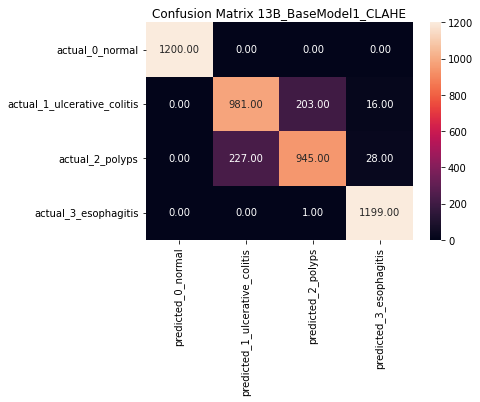

In [5]:
# Load best model from checkpoint folder
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_BaseModel1_CLAHE/checkpoint/11_BaseModel1_CLAHE.ckpt"
loadModel(BaseModel1_CLAHE,checkpointPath)
df_results_01, confusion_matrix_01, y_true_01, predictions_01 = testResults(BaseModel1_CLAHE, test_data, "13B_BaseModel1_CLAHE" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_BaseModel1_CLAHE/results/confusionMatrix/13B_BaseModel1_CLAHE.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_BaseModel1_CLAHE/results/classificationReport/13B_BaseModel1_CLAHE.csv")

### 13B_BaseModel2_MULTISCALE_tunedAdamLrScheduler: Base Model 2 with Image Processing MULTISCALE (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [6]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 34s 7ms/step
Confusion Matrix:


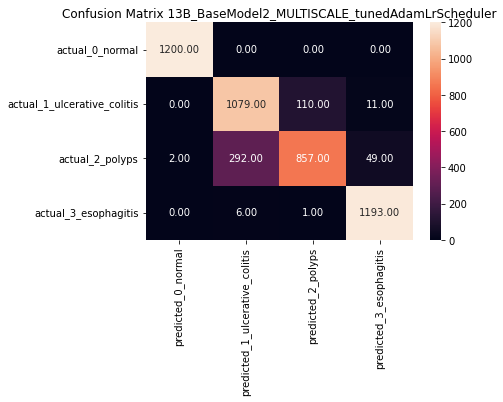

In [7]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/11_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results_02, confusion_matrix_02, y_true_02, predictions_02 = testResults(BaseModel2_MULTISCALE_tunedAdamLrScheduler, test_data, "13B_BaseModel2_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/13B_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/13B_BaseModel2_MULTISCALE_tunedAdamLrScheduler.csv")

### 13B_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdam: Transfer Learning with ResNet50V1 model on MULTISCALE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 61s 13ms/step
Confusion Matrix:


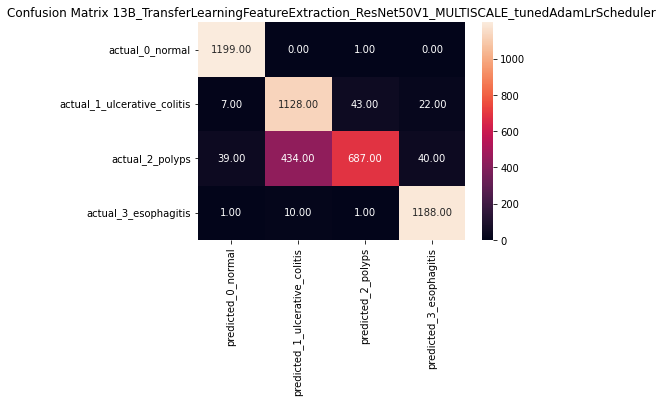

In [9]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results_03, confusion_matrix_03, y_true_03, predictions_03 = testResults(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, test_data, "13B_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/13B_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/13B_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.csv")

### 13B_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model on NORMAL Image (Optimizer - Adam + LrScheduler)

In [10]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 59s 12ms/step
Confusion Matrix:


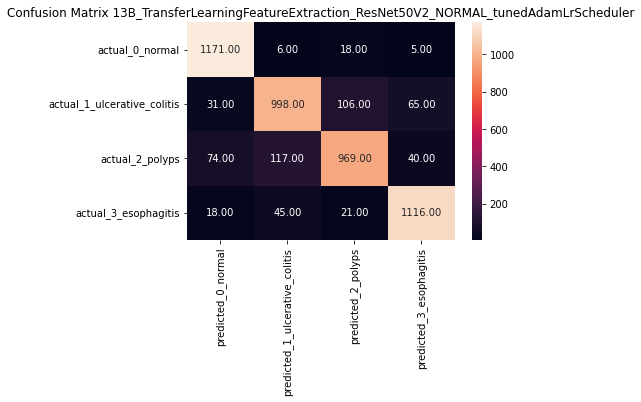

In [11]:
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results_04, confusion_matrix_04, y_true_04, predictions_04 = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, test_data, "13B_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/13B_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/classificationReport/13B_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.csv")

### 13B_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 41s 8ms/step
Confusion Matrix:


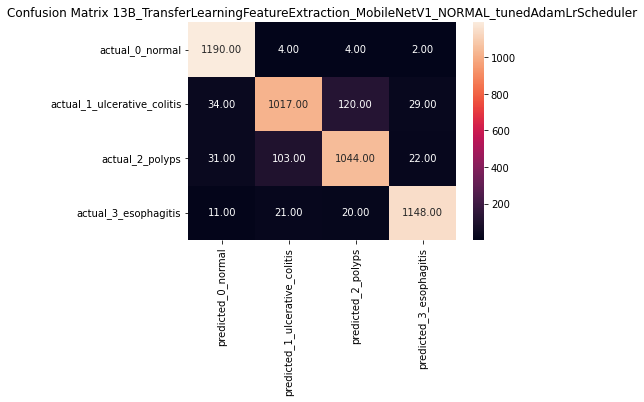

In [13]:
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results_05, confusion_matrix_05, y_true_05, predictions_05 = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "13B_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/13B_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/13B_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.csv")

### 13B_TransferLearningFeatureExtraction_MobileNetV2_CLAHE: Transfer Learning with MobileNetV2 model on CLAHE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [14]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 55s 11ms/step
Confusion Matrix:


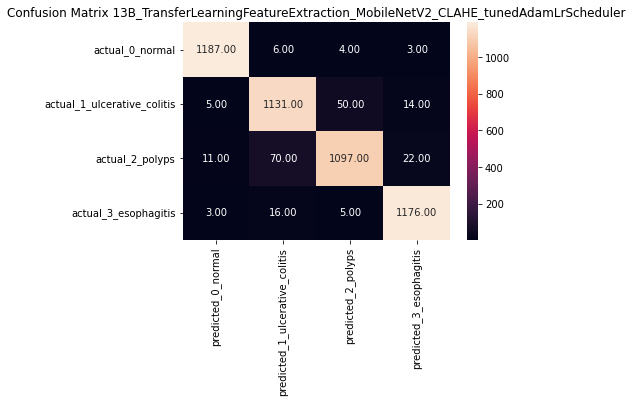

In [15]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"

loadModel(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results_06, confusion_matrix_06, y_true_06, predictions_06 = testResults(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, test_data, "13B_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/13B_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/classificationReport/13B_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.csv")


### 13B_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 63s 13ms/step
Confusion Matrix:


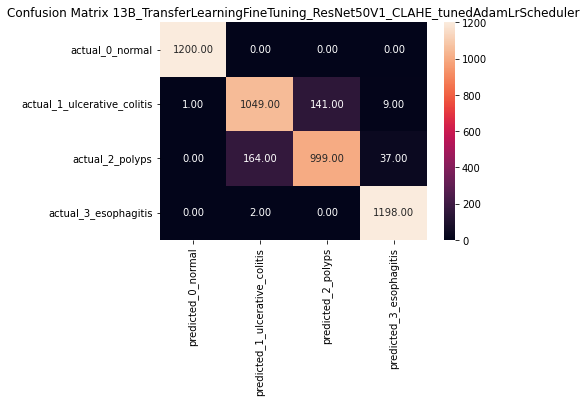

In [17]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/11_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results_07, confusion_matrix_07, y_true_07, predictions_07 = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, test_data, "13B_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/13B_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/classificationReport/13B_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.csv")

### 13B_TransferLearningFineTuning_ResNet50V2_RAYLEIGH: Transfer Learning with ResNet50V2 model on RAYLEIGH Image

#### Dataset Loading 

In [18]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 60s 12ms/step
Confusion Matrix:


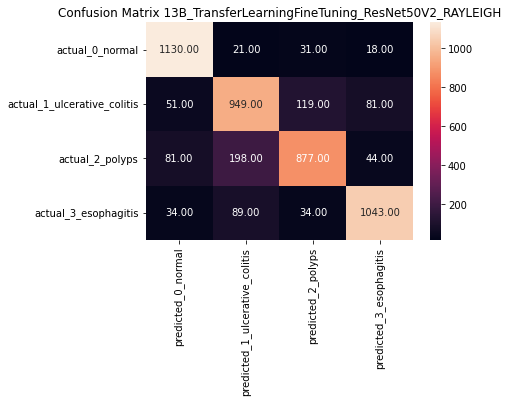

In [19]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH,checkpointPath)
df_results_08, confusion_matrix_08, y_true_08, predictions_08 = testResults(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, test_data, "13B_TransferLearningFineTuning_ResNet50V2_RAYLEIGH" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/confusionMatrix/13B_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/classificationReport/13B_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.csv")

### 13B_TransferLearningFineTuning_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image

#### Dataset Loading 

In [20]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetNormalization/test"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 40s 8ms/step
Confusion Matrix:


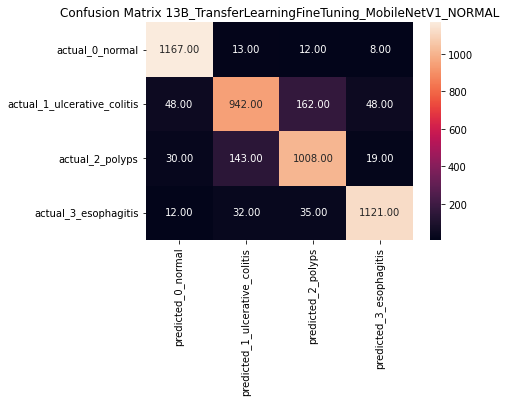

In [21]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV1_NORMAL,checkpointPath)
df_results_09, confusion_matrix_09, y_true_09, predictions_09 = testResults(TransferLearningFineTuning_MobileNetV1_NORMAL, test_data, "13B_TransferLearningFineTuning_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFineTuning_MobileNetV1_NORMAL/results/confusionMatrix/13B_TransferLearningFineTuning_MobileNetV1_NORMAL.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFineTuning_MobileNetV1_NORMAL/results/classificationReport/13B_TransferLearningFineTuning_MobileNetV1_NORMAL.csv")

### 13B_TransferLearningFineTuning_MobileNetV2_NORMAL: Transfer Learning with MobileNetV2 model on NORMAL Image

#### Loading Checkpoint & Prediction & Results

4800/4800 [==============================] - 52s 11ms/step
Confusion Matrix:


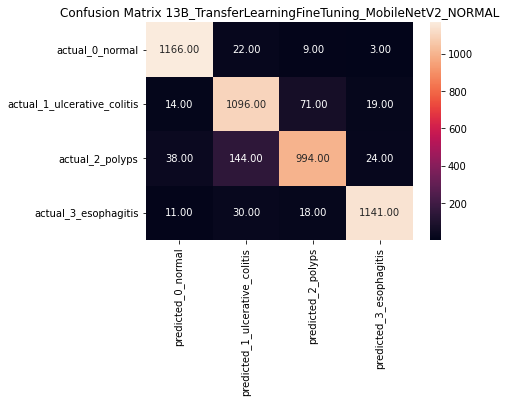

In [22]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAug/11_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/11_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV2_NORMAL,checkpointPath)
df_results_10, confusion_matrix_10, y_true_10, predictions_10 = testResults(TransferLearningFineTuning_MobileNetV2_NORMAL, test_data, "13B_TransferLearningFineTuning_MobileNetV2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TestResultsAug/13B_TransferLearningFineTuning_MobileNetV2_NORMAL/results/confusionMatrix/13B_TransferLearningFineTuning_MobileNetV2_NORMAL.jpg")
# saveResults_csv(df_results,"TestResultsAug/13B_TransferLearningFineTuning_MobileNetV2_NORMAL/results/classificationReport/13B_TransferLearningFineTuning_MobileNetV2_NORMAL.csv")

In [23]:
def most_frequent(List):
    return max(set(List), key = List.count)

finalResults = []
for i in range(len(predictions_01)):
    tempResultsArray = [predictions_01[i], predictions_02[i], predictions_03[i], predictions_04[i], predictions_05[i],
                  predictions_06[i], predictions_07[i], predictions_08[i], predictions_09[i], predictions_10[i]]
    
    tempResults = most_frequent(tempResultsArray)
    finalResults.append(tempResults)
finalResults

['0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',
 '0_normal',

Confusion Matrix:


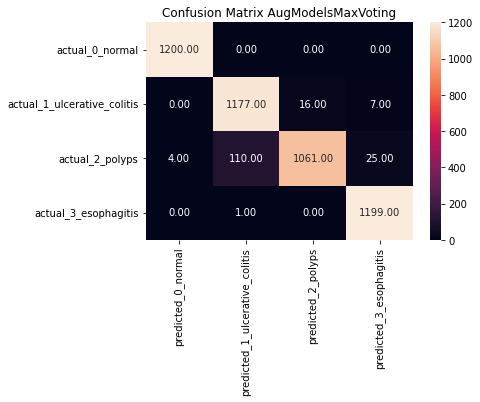

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
data_class = ["0_normal", "1_ulcerative_colitis", "2_polyps", "3_esophagitis"]
confusionMatrix = confusion_matrix(y_true_01, finalResults,
                                       labels=data_class)
print("Confusion Matrix:")
plt.figure()
sns.heatmap(confusionMatrix,
            xticklabels=["predicted_0_normal",
                         "predicted_1_ulcerative_colitis",
                         "predicted_2_polyps",
                         "predicted_3_esophagitis"]
            , yticklabels=["actual_0_normal",
                           "actual_1_ulcerative_colitis",
                           "actual_2_polyps",
                           "actual_3_esophagitis"]
            , annot=True, fmt='.2f')

plt.title("Confusion Matrix " + "AugModelsMaxVoting")
plt.savefig("TestResultsAug/13B_AugVotingModels/results/confusionMatrix/13B_AugVotingModels.jpg",bbox_inches='tight')
df = pd.DataFrame(classification_report(y_true_01, finalResults, output_dict=True))
df["modelName"] = "13B_AugVotingModels_TEST"
df["modelTag"] = "13B"
saveResults_csv(df, location = "TestResultsAug/13B_AugVotingModels/results/classificationReport/13B_AugVotingModels.csv")